['res', 'tp', 'fp', 'Latency(cycles)', 'Latency(ns)', 'FF', 'LUT']


IndexError: index 7 is out of bounds for axis 0 with size 7

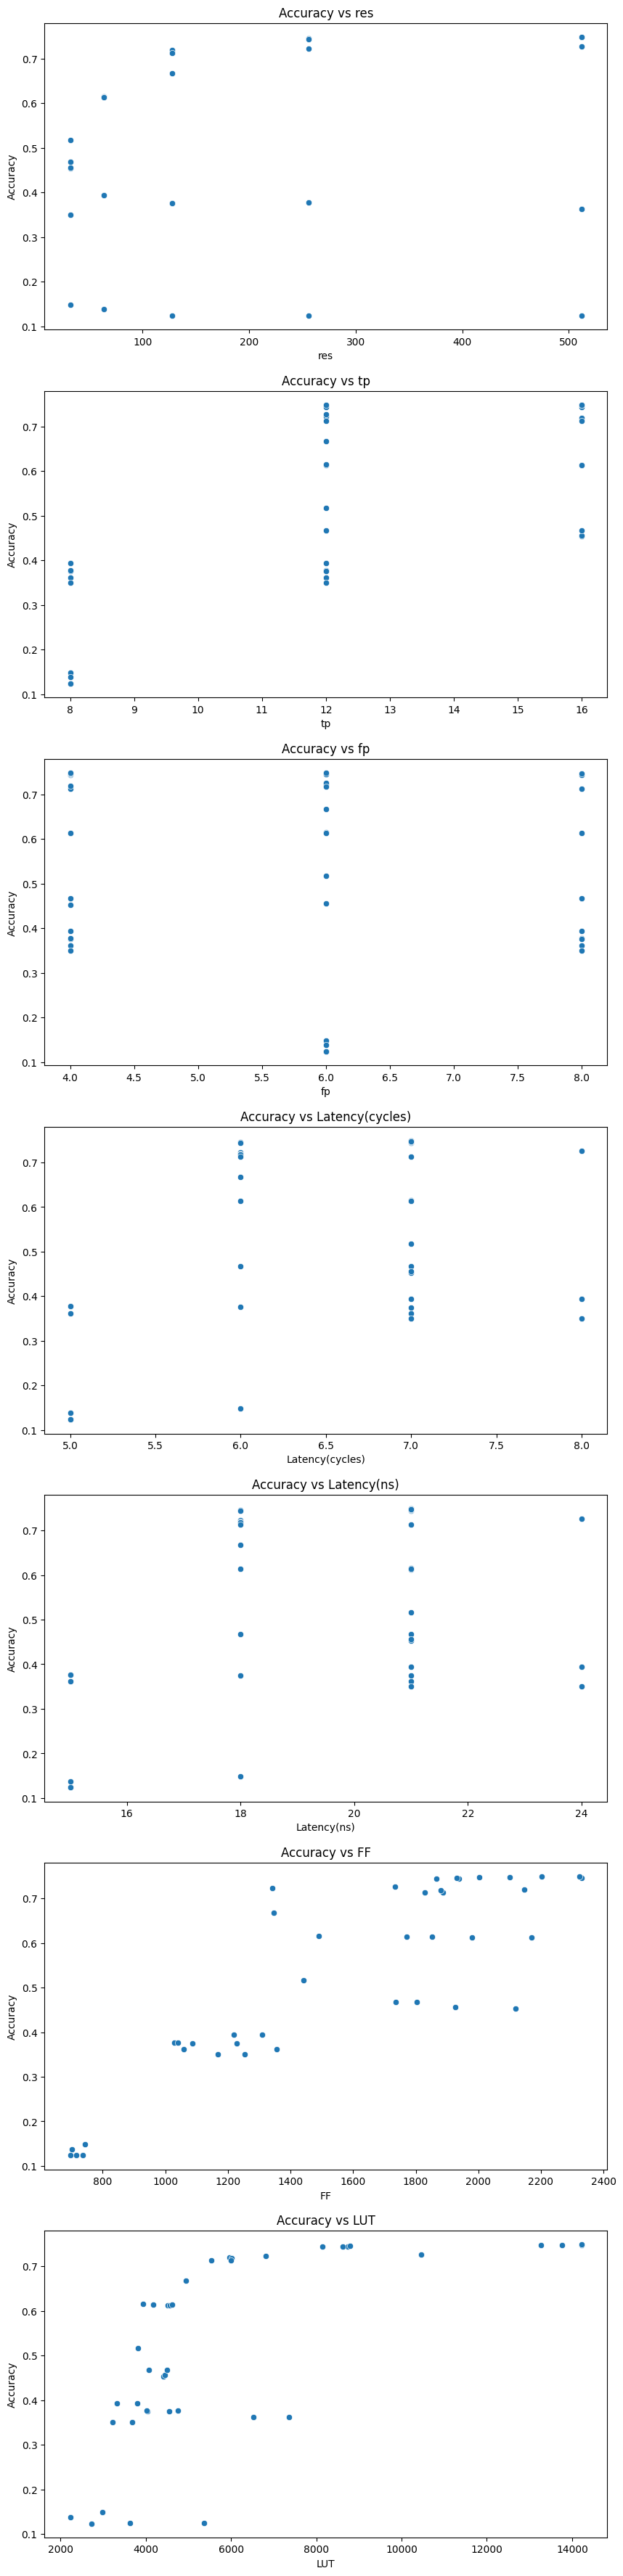

In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import os

BASE_DIR = "/home/aarushg/KAN-FPGA/benchmarks/hls4ml_jets"

# Get all CSV files from logs directory
csv_files = glob.glob(f'{BASE_DIR}/logs/*.csv')

# Read and concatenate all CSV files
df_list = []
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

# Calculate accuracy
df['accuracy'] = df['correct'] / df['total']

# Create subplots for each parameter
parameters = [col for col in df.columns if col not in ['correct', 'total', 'accuracy', 'Modules&Loops', 'Slack', 'Interval', 'Pipelined']]
fig, axs = plt.subplots((len(parameters) + 2), 1, figsize=(10, 5*(len(parameters) + 2)))

print(parameters)

# Plot accuracy vs each parameter
for i, param in enumerate(parameters + ['FF', 'LUT']):
    sns.scatterplot(data=df, x=param, y='accuracy', ax=axs[i])
    axs[i].set_title(f'Accuracy vs {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Accuracy')



plt.tight_layout()
plt.show()


fig, axs = plt.subplots(len(parameters), 1, figsize=(10, 5*(len(parameters) + 2)))

print(parameters)

# Plot accuracy vs each parameter
for i, param in enumerate(parameters):
    sns.scatterplot(data=df, x=param, y='FF', ax=axs[i])
    sns.scatterplot(data=df, x=param, y='LUT', ax=axs[i])
    axs[i].set_title(f'FF / LUT vs {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('FF / LUT usage')



plt.tight_layout()
plt.show()